In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

# rating 
ratings = pd.read_csv('ratings.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'movie_id', 'rating'])

# users 
users = pd.read_csv('users.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# movies 
movies = pd.read_csv('movies.csv', sep='\t', encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

In [2]:
# Selecting head of rating file
print(ratings.head())

   user_id  movie_id  rating
0        1      1193       5
1        1       661       3
2        1       914       3
3        1      3408       4
4        1      2355       5


In [3]:
# Selecting head of users file
print(users.head())

   user_id gender zipcode  age_desc              occ_desc
0        1      F   48067  Under 18          K-12 student
1        2      M   70072       56+         self-employed
2        3      M   55117     25-34             scientist
3        4      M   02460     45-49  executive/managerial
4        5      M   55455     25-34                writer


In [4]:
# Selecting head of movie file
print(movies.head())

   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy


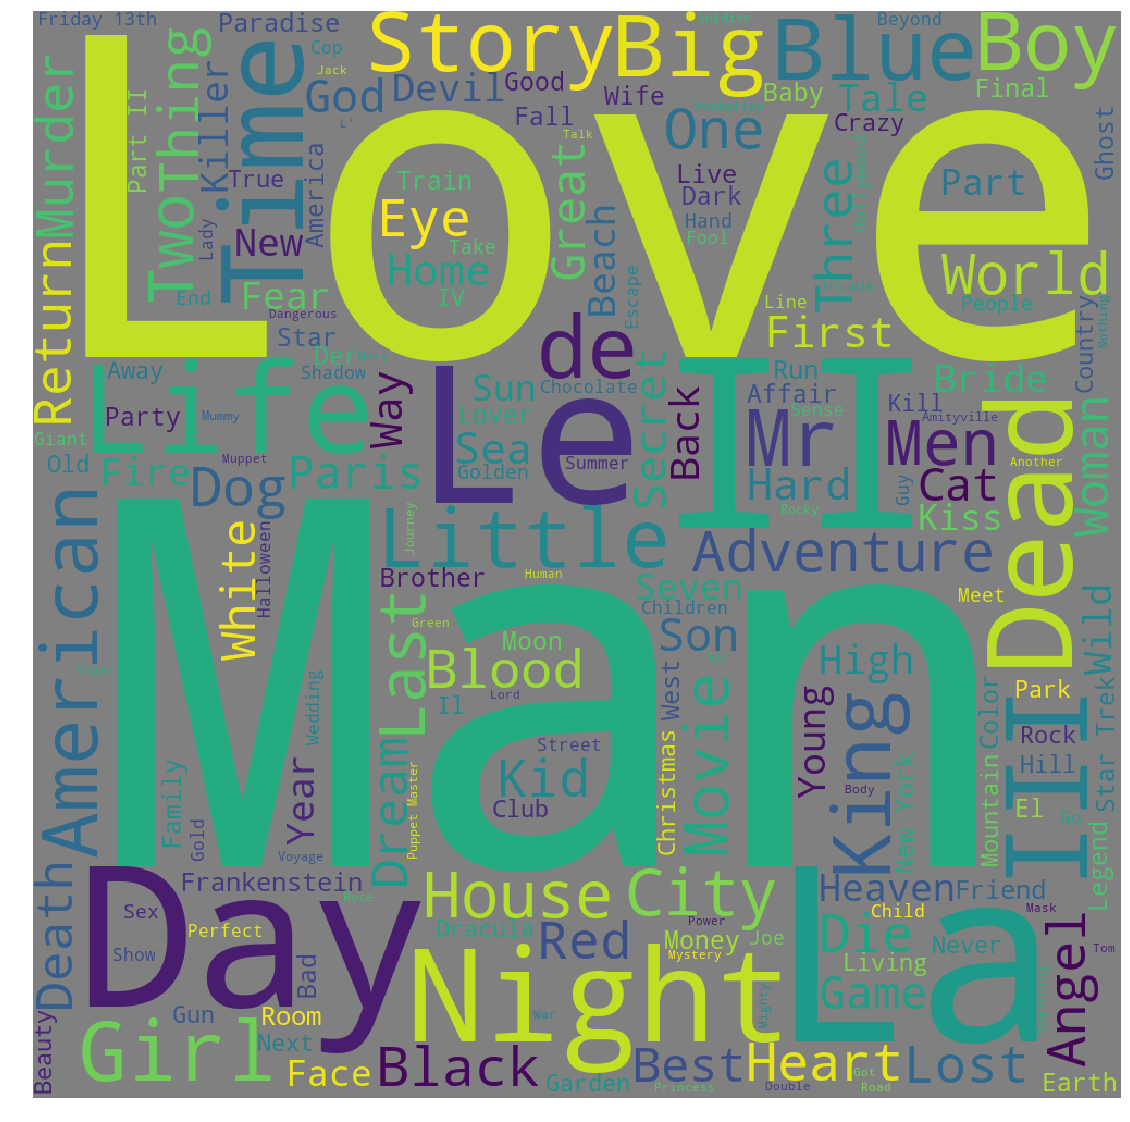

In [5]:
# Create a wordcloud of the movie titles
movies['title'] = movies['title'].fillna("").astype('str')
corpus = ' '.join(movies['title'])
movie_cloud = WordCloud(stopwords=STOPWORDS, background_color='Grey', height=1000, width=1000).generate(corpus)

# Plot the wordcloud
plt.figure(figsize=(20,20))
plt.imshow(movie_cloud)
plt.axis('off')
plt.show()

In [6]:
# Statistical analysis of rating
ratings['rating'].describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [7]:
# Statistical analysis of gender
users['gender'].describe()

count     6040
unique       2
top          M
freq      4331
Name: gender, dtype: object

In [8]:
# Statistical analysis of user age
users['age_desc'].describe()

count      6040
unique        7
top       25-34
freq       2096
Name: age_desc, dtype: object

In [9]:
# Statistical analysis of avilable genres
movies['genres'].describe()

count      3883
unique      301
top       Drama
freq        843
Name: genres, dtype: object

In [10]:
# Mergering files for collabrative dataset
df = pd.merge(pd.merge(movies, ratings),users)
# Top rated movies
df[['title','genres','rating']].sort_values('rating', ascending=False).head(30)

,title,genres,rating
0,Toy Story (1995),Animation|Children's|Comedy,5
489283,American Beauty (1999),Comedy|Drama,5
489259,Election (1999),Comedy,5
489257,"Matrix, The (1999)",Action|Sci-Fi|Thriller,5
489256,Dead Ringers (1988),Drama|Thriller,5
489237,Rushmore (1998),Comedy,5
489236,"Simple Plan, A (1998)",Crime|Thriller,5
489226,Hands on a Hard Body (1996),Documentary,5
489224,Pleasantville (1998),Comedy,5
489212,Say Anything... (1989),Comedy|Drama|Romance,5


In [11]:
# Make a census of the genre keywords
la_g = set()
for s in movies['genres'].str.split('|').values:
    la_g = la_g.union(set(s))

# Function that counts the number of times each of the genre keywords appear
def tally_words(df, ref_col, census):
    c_k = dict()
    for s in census: 
        c_k[s] = 0
    for k_c in df[ref_col].str.split('|'):        
        if type(k_c) == float and pd.isnull(k_c): 
            continue        
        for s in [s for s in k_c if s in census]: 
            if pd.notnull(s): 
                c_k[s] += 1
    
    o_k = []
    for k,v in c_k.items():
        o_k.append([k,v])
    o_k.sort(key = lambda x:x[1], reverse = True)
    return o_k, c_k


o_k, dum = tally_words(movies, 'genres', la_g)
o_k[:5]

[['Drama', 1603],
 ['Comedy', 1200],
 ['Action', 503],
 ['Thriller', 492],
 ['Romance', 471]]

In [12]:
usr_uniq = ratings.user_id.unique().shape[0]
mov_uniq = ratings.movie_id.unique().shape[0]
print('Total unique users = ' + str(usr_uniq) + ' | Total unique movies = ' + str(mov_uniq))

Total unique users = 6040 | Total unique movies = 3706


In [13]:
Ratings = ratings.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0)
Ratings.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
R = Ratings.as_matrix()
u_r_m = np.mean(R, axis = 1)
r_d = R - u_r_m.reshape(-1, 1)

In [15]:
sparsity = round(1.0 - len(ratings) / float(usr_uniq* mov_uniq), 3)
print('Sparsity is: ' +  str(sparsity * 100) + '%')


Sparsity is: 95.5%


In [16]:
from scipy.sparse.linalg import svds
A, S, Vt = svds(r_d, k = 30)

In [17]:
S = np.diag(S)

In [18]:
all_user_predicted_ratings = np.dot(np.dot(A, S), Vt) + u_r_m.reshape(-1, 1)

In [19]:
preds = pd.DataFrame(all_user_predicted_ratings, columns = Ratings.columns)
preds.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
0,3.442625,0.358044,-0.105812,-0.023219,0.069213,-0.231869,-0.090654,0.168163,-0.028309,-0.143087,...,-0.002567,0.017875,0.048296,0.003024,-0.084887,0.334150,-0.033739,0.008463,0.016165,0.123165
1,1.089584,0.312569,0.230696,0.081019,0.060117,0.906620,0.114709,0.021808,0.137063,1.537023,...,-0.053105,-0.010125,-0.010267,0.039136,-0.002546,0.185915,-0.180181,-0.032201,-0.018356,-0.028606
2,1.432166,0.758911,0.107500,-0.065718,-0.082203,-0.057954,-0.325788,0.076725,0.092938,0.523805,...,0.013384,0.017582,0.041770,0.057209,0.049630,0.224606,-0.122320,-0.020002,0.013278,-0.088445
3,0.275723,-0.094641,-0.023144,0.069277,0.102366,0.296911,-0.045057,0.013629,0.012182,-0.048750,...,0.004313,-0.001245,-0.008279,-0.011575,-0.042858,0.002560,0.021620,-0.016255,0.012187,-0.059760
4,0.957808,0.095411,0.020964,0.135974,-0.066035,1.191485,-0.225668,-0.007365,-0.073028,0.386470,...,0.100444,0.002414,-0.013178,-0.021767,0.000670,0.063411,0.509811,0.011632,0.100463,0.227215


In [20]:
def movie_reccomendation_engine(predictions, userID, movies, original_ratings, num_re):
    
    # managing user prediction by ordering in descending order
    u_r = userID - 1 
    s_p = preds.iloc[u_r].sort_values(ascending=False)
    
    # Blending users and rating data together for prediction
    user_data = original_ratings[original_ratings.user_id == (userID)]
    u_f = (user_data.merge(movies, how = 'left', left_on = 'movie_id', right_on = 'movie_id').
                     sort_values(['rating'], ascending=False)
                 )

    print('User {0} has already rated {1} movies.'.format(userID, u_f.shape[0]))
    
    # non-rated reccomendation 
    re = (movies[~movies['movie_id'].isin(u_f['movie_id'])].
         merge(pd.DataFrame(s_p).reset_index(), how = 'left',
               left_on = 'movie_id',
               right_on = 'movie_id').
         rename(columns = {u_r: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_re, :-1]
                      )

    return u_f, re

In [21]:
rated, pred = movie_reccomendation_engine(preds, 420, movies, ratings, 20)


User 420 has already rated 64 movies.


In [22]:
# Most liked mpvies by user 420 
rated.head(20)

,user_id,movie_id,rating,title,genres
63,420,1244,5,Manhattan (1979),Comedy|Drama|Romance
18,420,858,5,"Godfather, The (1972)",Action|Crime|Drama
41,420,2924,5,Drunken Master (Zui quan) (1979),Action|Comedy
51,420,1215,5,Army of Darkness (1993),Action|Adventure|Comedy|Horror|Sci-Fi
22,420,3097,5,"Shop Around the Corner, The (1940)",Comedy|Romance
23,420,898,5,"Philadelphia Story, The (1940)",Comedy|Romance
26,420,2395,5,Rushmore (1998),Comedy
48,420,3751,5,Chicken Run (2000),Animation|Children's|Comedy
28,420,3424,5,Do the Right Thing (1989),Comedy|Drama
29,420,3429,5,Creature Comforts (1990),Animation|Comedy


In [23]:
# Reccomended movies for user 420
pred

,movie_id,title,genres
1109,1136,Monty Python and the Holy Grail (1974),Comedy
1165,1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance
1332,1387,Jaws (1975),Action|Horror
1179,1214,Alien (1979),Action|Horror|Sci-Fi|Thriller
1190,1230,Annie Hall (1977),Comedy|Romance
2989,3114,Toy Story 2 (1999),Animation|Children's|Comedy
1220,1265,Groundhog Day (1993),Comedy|Romance
3295,3421,Animal House (1978),Comedy
1194,1234,"Sting, The (1973)",Comedy|Crime
1339,1394,Raising Arizona (1987),Comedy
